# Exploratory Data  Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
X = pd.read_csv('data/Training-set-values.csv')
y = pd.read_csv('data/Training-set-labels.csv')

In [3]:
X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
y['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [6]:
X.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [7]:
drop_cols = []

In [8]:
X.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [9]:
X['date_recorded'] = pd.to_datetime(X['date_recorded'])

In [10]:
# Explore the dataset
display(X.describe())

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [11]:
X_num = X.select_dtypes(exclude='object')
X_num = X_num.drop(['id'], axis=1)

# Create a box plot of each column
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(X_num.columns), figsize=(40,20))

for i, ax in enumerate(axs.flat):
    ax.boxplot(X_num.iloc[:,i], flierprops=red_circle)
    X_num.iloc[:,i]
    ax.set_title(X_num.columns[i], fontsize=30, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout();

### Dropping Columns

The following columns are geographical locations:

In [12]:
geo_cols = ['longitude', 'latitude', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']

In [13]:
X[geo_cols]

,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward
0,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi
1,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta
2,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika
3,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu
4,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi
...,...,...,...,...,...,...,...,...,...
59395,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi
59396,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo
59397,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala
59398,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu


In [14]:
print(X['subvillage'].nunique())
print(X['lga'].nunique())
print(X['ward'].nunique())

19287
125
2092


In [15]:
drop_cols += ['subvillage', 'region', 'lga', 'ward']

In [16]:
extract_cols = ['extraction_type', 'extraction_type_group', 'extraction_type_class']
X[extract_cols]

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
1,gravity,gravity,gravity
2,gravity,gravity,gravity
3,submersible,submersible,submersible
4,gravity,gravity,gravity
...,...,...,...
59395,gravity,gravity,gravity
59396,gravity,gravity,gravity
59397,swn 80,swn 80,handpump
59398,nira/tanira,nira/tanira,handpump


In [17]:
drop_cols += ['extraction_type_group', 'extraction_type_class']

In [18]:
quality_cols = ['water_quality', 'quality_group']
X[quality_cols]

,water_quality,quality_group
0,soft,good
1,soft,good
2,soft,good
3,soft,good
4,soft,good
...,...,...
59395,soft,good
59396,soft,good
59397,fluoride,fluoride
59398,soft,good


In [19]:
source_cols = ['source', 'source_type', 'source_class']
X[source_cols]

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
4,rainwater harvesting,rainwater harvesting,surface
...,...,...,...
59395,spring,spring,groundwater
59396,river,river/lake,surface
59397,machine dbh,borehole,groundwater
59398,shallow well,shallow well,groundwater


In [20]:
drop_cols += ['source_type']

In [21]:
X[['management', 'management_group']]

,management,management_group
0,vwc,user-group
1,wug,user-group
2,vwc,user-group
3,vwc,user-group
4,other,other
...,...,...
59395,water board,user-group
59396,vwc,user-group
59397,vwc,user-group
59398,vwc,user-group


In [22]:
X['management_group'].unique()

array(['user-group', 'other', 'commercial', 'parastatal', 'unknown'],
      dtype=object)

In [23]:
X[['waterpoint_type', 'waterpoint_type_group']]

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
1,communal standpipe,communal standpipe
2,communal standpipe multiple,communal standpipe
3,communal standpipe multiple,communal standpipe
4,communal standpipe,communal standpipe
...,...,...
59395,communal standpipe,communal standpipe
59396,communal standpipe,communal standpipe
59397,hand pump,hand pump
59398,hand pump,hand pump


In [24]:
drop_cols += ['waterpoint_type_group']

In [25]:
X[['scheme_management', 'scheme_name']]

,scheme_management,scheme_name
0,VWC,Roman
1,Other,NaN
2,VWC,Nyumba ya mungu pipe scheme
3,VWC,NaN
4,NaN,NaN
...,...,...
59395,Water Board,Losaa Kia water supply
59396,VWC,Ikondo electrical water sch
59397,VWC,NaN
59398,VWC,NaN


In [26]:
drop_cols += ['scheme_name']

In [27]:
X[['payment', 'payment_type']]

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
...,...,...
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly
59398,never pay,never pay


In [28]:
drop_cols += ['payment']

In [29]:
X[['quantity', 'quantity_group']]

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
2,enough,enough
3,dry,dry
4,seasonal,seasonal
...,...,...
59395,enough,enough
59396,enough,enough
59397,enough,enough
59398,insufficient,insufficient


In [30]:
drop_cols += ['quantity_group']

In [31]:
X[['waterpoint_type', 'waterpoint_type_group']]

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
1,communal standpipe,communal standpipe
2,communal standpipe multiple,communal standpipe
3,communal standpipe multiple,communal standpipe
4,communal standpipe,communal standpipe
...,...,...
59395,communal standpipe,communal standpipe
59396,communal standpipe,communal standpipe
59397,hand pump,hand pump
59398,hand pump,hand pump


In [32]:
drop_cols += ['waterpoint_type_group']

In [33]:
X['recorded_by'].nunique()

1

In [34]:
drop_cols += ['recorded_by', 'num_private', 'id']
drop_cols

['subvillage',
 'region',
 'lga',
 'ward',
 'extraction_type_group',
 'extraction_type_class',
 'source_type',
 'waterpoint_type_group',
 'scheme_name',
 'payment',
 'quantity_group',
 'waterpoint_type_group',
 'recorded_by',
 'num_private',
 'id']

In [35]:
df = pd.concat([X.drop(columns=drop_cols), y], axis=1)

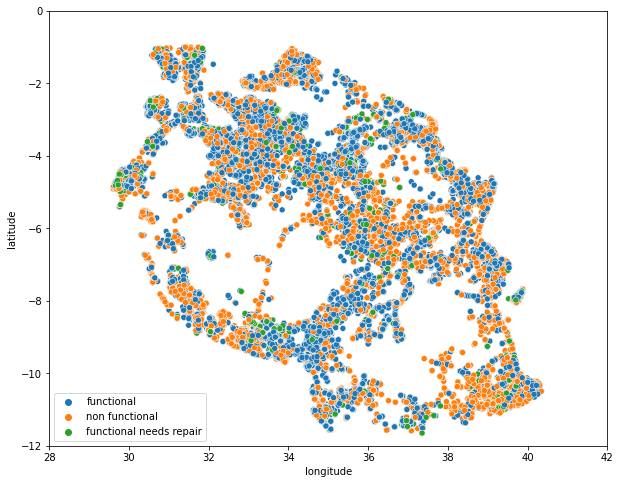

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', 
                hue='status_group', data=df, ax=ax)
plt.ylim(-12, 0)
plt.xlim(28, 42)
plt.legend(loc='lower left')

### Data Shape

In [37]:
print('train data:',X.shape)

train data: (59400, 40)


In [38]:
X.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


### Visualizing Missing Values for Train Data

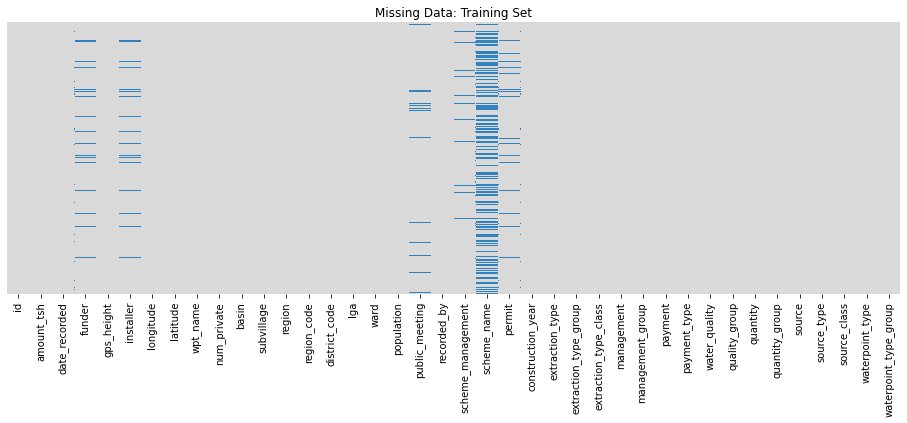

In [39]:
plt.figure(figsize = (16,5))
sns.heatmap(X.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [40]:
def missing_zero_values_table(X):
        zero_val = (X == 0.00).astype(int).sum(axis=0)
        mis_val = X.isnull().sum()
        mis_val_percent = 100 * X.isnull().sum() / len(X)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(X)
        mz_table['Data Type'] = X.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(X.shape[1]) + " columns and " + str(X.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(X)

Your selected dataframe has 40 columns and 59400 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
scheme_name,0,28166,47.4,28166,47.4,object
scheme_management,0,3877,6.5,3877,6.5,object
installer,0,3655,6.2,3655,6.2,object
funder,0,3635,6.1,3635,6.1,object
public_meeting,5055,3334,5.6,8389,14.1,object
permit,17492,3056,5.1,20548,34.6,object
subvillage,0,371,0.6,371,0.6,object


The "scheme_name" and "permit" columns are missing a significant amount of their values. "Funder" and "installer" seem to be duplicate columns. "Public meeting" and "scheme_management" are also missing multiple values.

In [41]:
# Removing "scheme_name" and permit
X.drop(['scheme_name',"permit","date_recorded"], axis = 1, inplace = True)

In [42]:
# Data types
print(X.info())

# Identify non-null objects
print('\n')
print('Non-Null Objects to Be Converted to Category')
print(X.select_dtypes(['object']).columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [43]:
g = X.columns.to_series().groupby(X.dtypes).groups
g

{int64: ['id', 'gps_height', 'num_private', 'region_code', 'district_code', 'population', 'construction_year'], float64: ['amount_tsh', 'longitude', 'latitude'], object: ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']}

In [44]:
cols_to_exclude = ['amount_tsh','date_recorded', 'gps_height','installer','longiude','latitude','num_private','regin_code','district_code','population','construction_year']
for col in df.columns:
    if col not in cols_to_exclude:
        df[col] = df[col].astype('category')

In [45]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

Memory usage went down by 1MB by converting to categorical values. This is not a significant decrease, this step can be skipped

### Preping numeric features

In [46]:
# Numeric summary
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


# Workflow with Pipelines

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [49]:
def grab_numeric(df):
    return df.select_dtypes(include=['float', 'int'])

In [50]:
# The FunctionTransformer will turn my function
# into a transformer.

GrabNumeric = FunctionTransformer(grab_numeric)

In [51]:
pipe = Pipeline(steps=[('num', GrabNumeric),
                       ('ss', StandardScaler())])

In [52]:
pipe.fit(X_train)

Pipeline(steps=[('num',
                 FunctionTransformer(func=<function grab_numeric at 0x7fc54979faf0>)),
                ('ss', StandardScaler())])

In [53]:
pipe.transform(X_train)

array([[-0.14706704, -0.09307351, -0.48786917, ..., -0.47999785,
        -0.20973197,  0.7029537 ],
       [ 0.58622773, -0.09914958, -0.96404191, ..., -0.47999785,
        -0.37956688, -1.37144446],
       [ 0.10260493, -0.09914958, -0.96404191, ..., -0.17040775,
        -0.37956688, -1.37144446],
       ...,
       [-0.06109069, -0.09914958, -0.98280023, ..., -0.06721105,
         1.74336955,  0.73766726],
       [ 0.57643119, -0.09914958, -0.96404191, ...,  0.03598565,
        -0.37956688, -1.37144446],
       [-0.61930719, -0.09914958,  0.89736062, ..., -0.47999785,
        -0.37744395,  0.7071614 ]])

### Selecting columns for ColumnTransformer

In [54]:
X.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [55]:
#subpipe_num = Pipeline(steps=[('num_impute', SimpleImputer(missing_values='NAN', strategy='mean', fill_value=None)),
#                           ('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('cat_impute', SimpleImputer(missing_values='NAN', strategy='most_frequent', fill_value=None)),
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [56]:
#CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, [2, 3, 4, 6]),
#                                         ('subpipe_cat', subpipe_cat, [0, 1, 5, 7, 8])],
CT = ColumnTransformer(transformers=[('subpipe_cat', subpipe_cat, [0, 1, 5, 7, 8])],
                           remainder='passthrough')

ColumnTransformer will preprocess. Our model can now be added to the pipeline.

In [57]:
logreg_model_pipe = Pipeline(steps=[('ct', CT),
                            ('logreg', LogisticRegression(random_state=42))])

In [58]:
# Fitting our model
logreg_model_pipe.fit(X_train, y_train)

In [1]:
#logreg_model_pipe.score(X_train, y_train)

NameError: name 'logreg_model_pipe' is not defined

In [2]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_nam
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [3]:
log_pipe = ModelWithCV(logreg_model_pipe, model_name='log_pipe', X=X_train, y=y_train)

NameError: name 'logreg_model_pipe' is not defined

In [4]:
fig, ax = plt.subplots()

log_pipe.plot_cv(ax=ax);

NameError: name 'plt' is not defined